# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (Step 1)
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url).json()
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}

        # Step 5: Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lon = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa cruz
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | altay
Processing Record 4 of Set 1 | nelson bay
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | songea
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | selfoss
Processing Record 13 of Set 1 | la passe
Processing Record 14 of Set 1 | sturgis
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | taiohae
Processing Record 18 of Set 1 | egilsstadir
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | west island
Processing Record 22 of 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          50
Lat           49
Lon           49
Max Temp      49
Humidity      49
Cloudiness    49
Wind Speed    49
Country       49
Date          49
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa cruz,-17.8000,-63.1667,26.03,65.0,76.0,7.72,BO,1.717972e+09
1,adamstown,-25.0660,-130.1015,22.44,73.0,100.0,4.09,PN,1.717972e+09
2,altay,47.8667,88.1167,14.67,71.0,13.0,2.20,CN,1.717971e+09
3,nelson bay,-32.7167,152.1500,11.72,76.0,5.0,0.89,AU,1.717972e+09
4,port-aux-francais,-49.3500,70.2167,4.82,96.0,100.0,15.48,TF,1.717972e+09


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa cruz,-17.8000,-63.1667,26.03,65.0,76.0,7.72,BO,1.717972e+09
1,adamstown,-25.0660,-130.1015,22.44,73.0,100.0,4.09,PN,1.717972e+09
2,altay,47.8667,88.1167,14.67,71.0,13.0,2.20,CN,1.717971e+09
3,nelson bay,-32.7167,152.1500,11.72,76.0,5.0,0.89,AU,1.717972e+09
4,port-aux-francais,-49.3500,70.2167,4.82,96.0,100.0,15.48,TF,1.717972e+09


In [31]:
df = city_data_df.dropna(how="any").reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     48 non-null     int64  
 1   City        48 non-null     object 
 2   Lat         48 non-null     float64
 3   Lon         48 non-null     float64
 4   Max Temp    48 non-null     float64
 5   Humidity    48 non-null     float64
 6   Cloudiness  48 non-null     float64
 7   Wind Speed  48 non-null     float64
 8   Country     48 non-null     object 
 9   Date        48 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.9+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

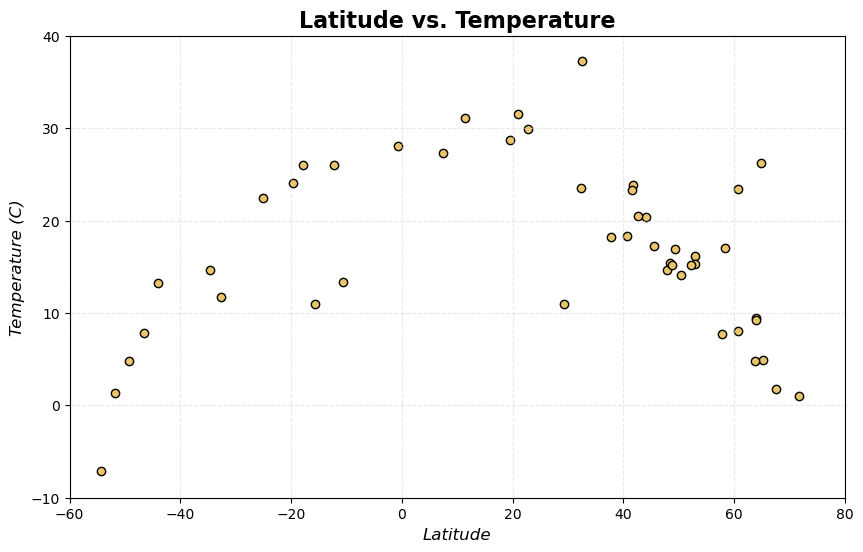

In [36]:
# Build scatter plot for latitude vs. temperature
# Step 1: Data
x_values = df.Lat
y_values = df["Max Temp"]

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#e9c46a", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (C)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(-10, 40)
plt.xlim(-60, 80)

# Save the figure
plt.savefig("../output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

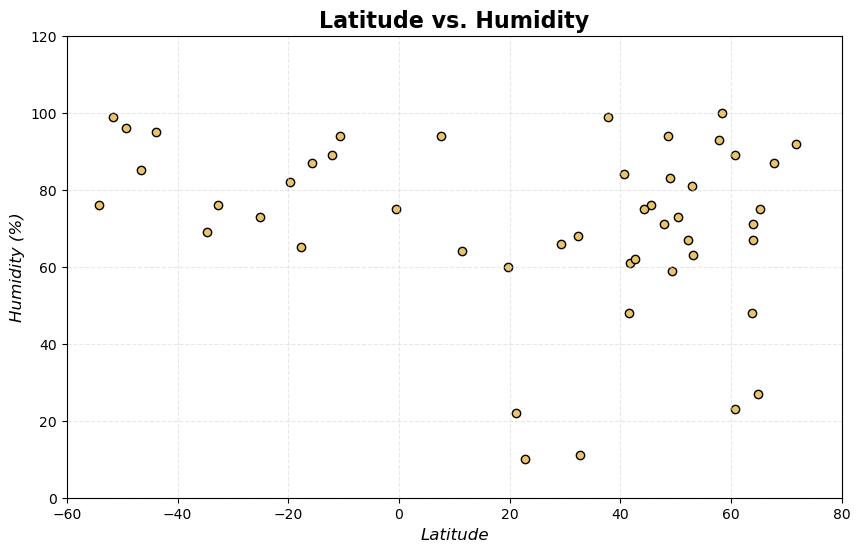

In [46]:
# Build scatter plot for latitude vs. humidity
# Step 1: Data
x_values = df.Lat
y_values = df.Humidity

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#e9c46a", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(0, 120)
plt.xlim(-60, 80)

# Save the figure
plt.savefig("../output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

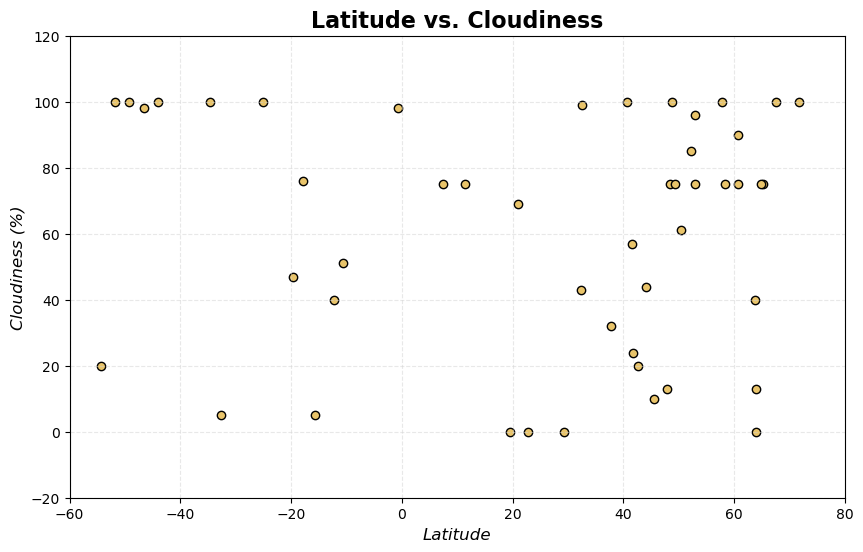

In [49]:
# Build scatter plot for latitude vs. cloudiness
# Step 1: Data
x_values = df.Lat
y_values = df.Cloudiness

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#e9c46a", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(-20, 120)
plt.xlim(-60, 80)

# Save the figure
plt.savefig("../output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

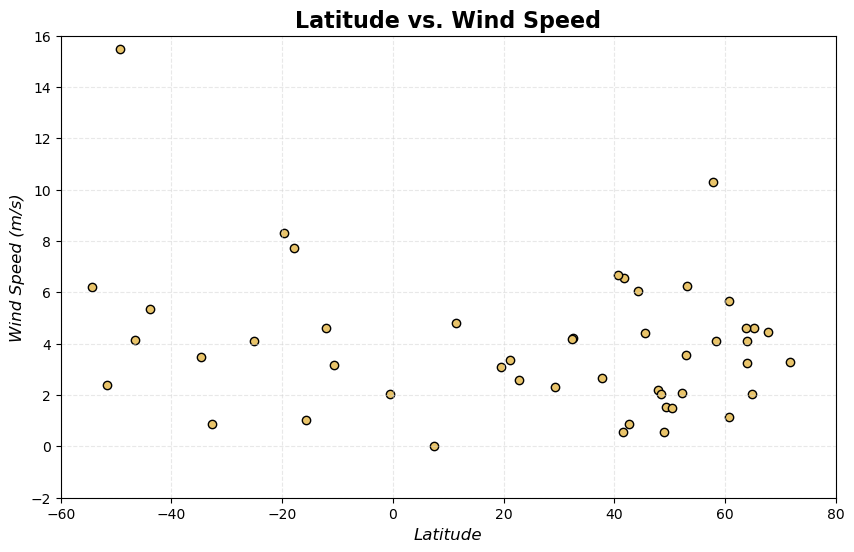

In [52]:
# Build scatter plot for latitude vs. wind speed
# Step 1: Data
x_values = df.Lat
y_values = df["Wind Speed"]

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#e9c46a", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(-2, 16)
plt.xlim(-60, 80)

# Save the figure
#plt.savefig("../output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="#e9c46a", edgecolor="black")
    plt.plot(x_values, regress_values, "#A31621") 
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15)
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,altay,47.8667,88.1167,14.67,71.0,13.0,2.20,CN,1.717971e+09
5,5,vilyuchinsk,52.9306,158.4028,16.15,81.0,96.0,3.56,RU,1.717972e+09
6,6,petropavlovsk-kamchatsky,53.0452,158.6483,15.33,63.0,75.0,6.26,RU,1.717972e+09
8,8,hawaiian paradise park,19.5933,-154.9731,28.73,60.0,0.0,3.09,US,1.717972e+09
10,10,whitehorse,60.7161,-135.0538,23.39,23.0,75.0,5.66,CA,1.717972e+09


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,santa cruz,-17.8000,-63.1667,26.03,65.0,76.0,7.72,BO,1.717972e+09
1,1,adamstown,-25.0660,-130.1015,22.44,73.0,100.0,4.09,PN,1.717972e+09
3,3,nelson bay,-32.7167,152.1500,11.72,76.0,5.0,0.89,AU,1.717972e+09
4,4,port-aux-francais,-49.3500,70.2167,4.82,96.0,100.0,15.48,TF,1.717972e+09
7,7,songea,-10.6833,35.6500,13.38,94.0,51.0,3.17,TZ,1.717972e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5772234200756339


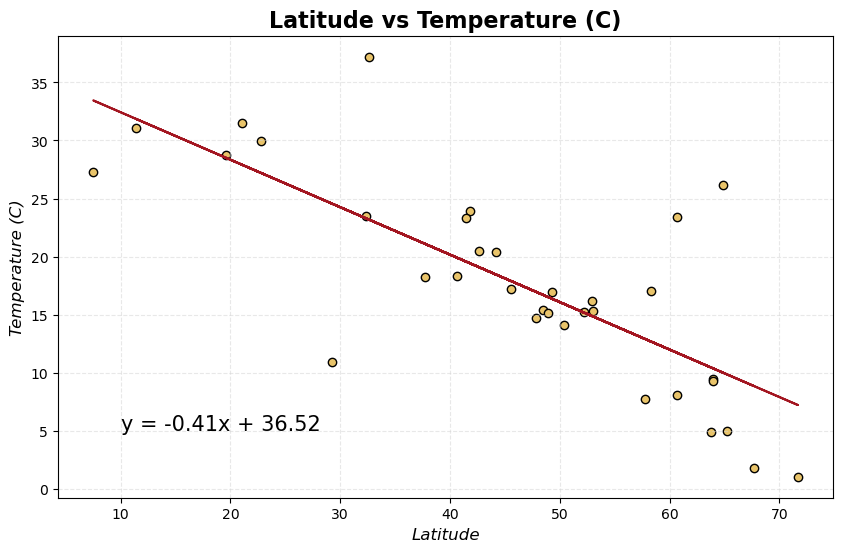

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature (C)", (10,5))

The r-squared is: 0.6799770243598307


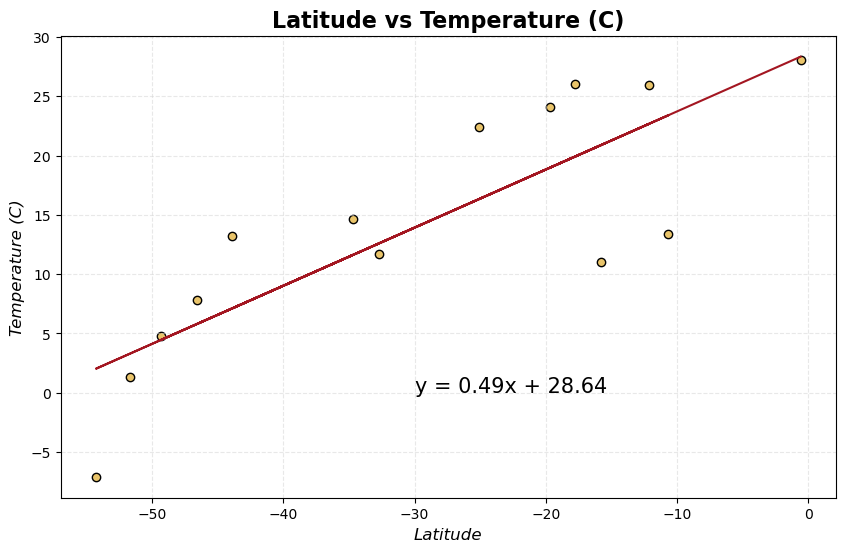

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature (C)", (-30,0))

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a clear negative relationship with the temperature as the latitude increases with an R^2 of approx: 0.57. The opposite applies in the Southern Hemisphere with an R^2 of approx: 0.68.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05033607972020806


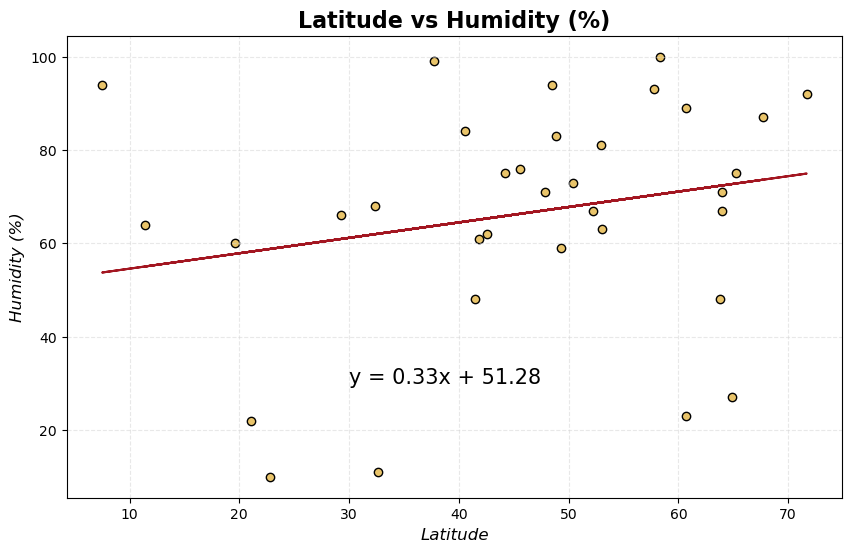

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
doRegression(x_values, y_values, "Latitude", "Humidity (%)", (30,30))

The r-squared is: 0.07662464444347743


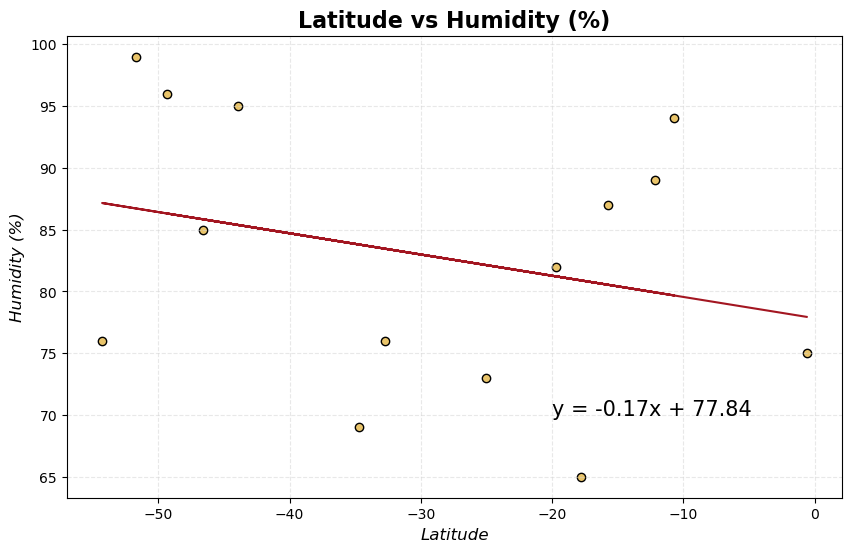

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity
doRegression(x_values, y_values, "Latitude", "Humidity (%)", (-20,70))

**Discussion about the linear relationship:** There is little to no linear correlation between Latitude and Humidity in both the Northern (R^2: 0.050) and Southern (R^2: 0.076) Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06560737015149852


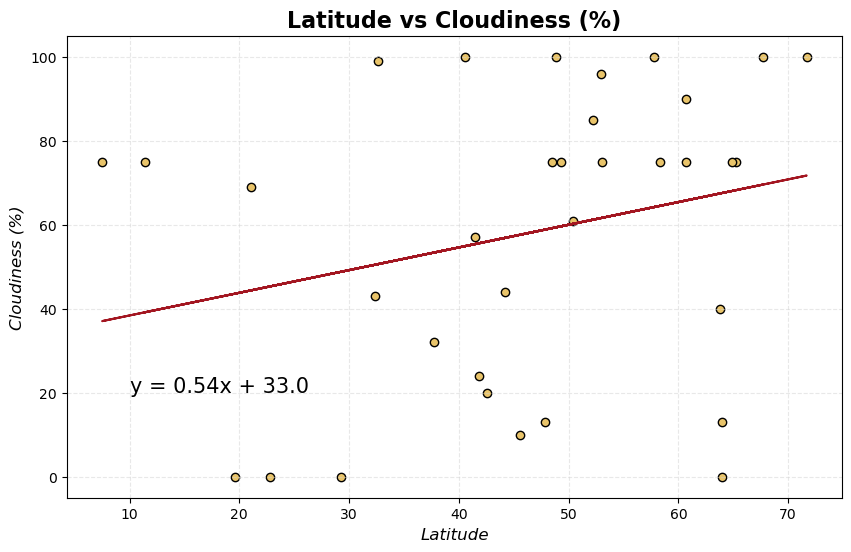

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness (%)", (10,20))

The r-squared is: 0.04712585726308513


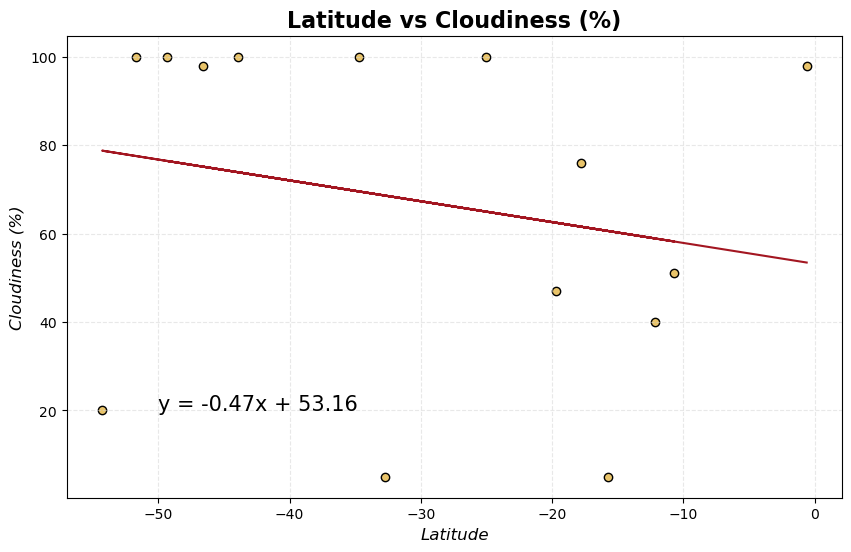

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:** There is not a clear regression in both Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03534919216308716


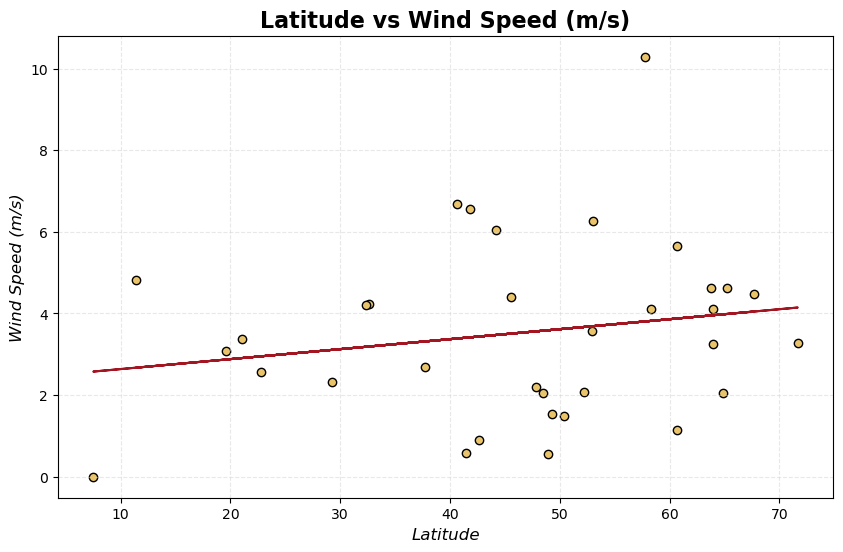

In [72]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed (m/s)", (-30,0))

The r-squared is: 0.09920672685429788


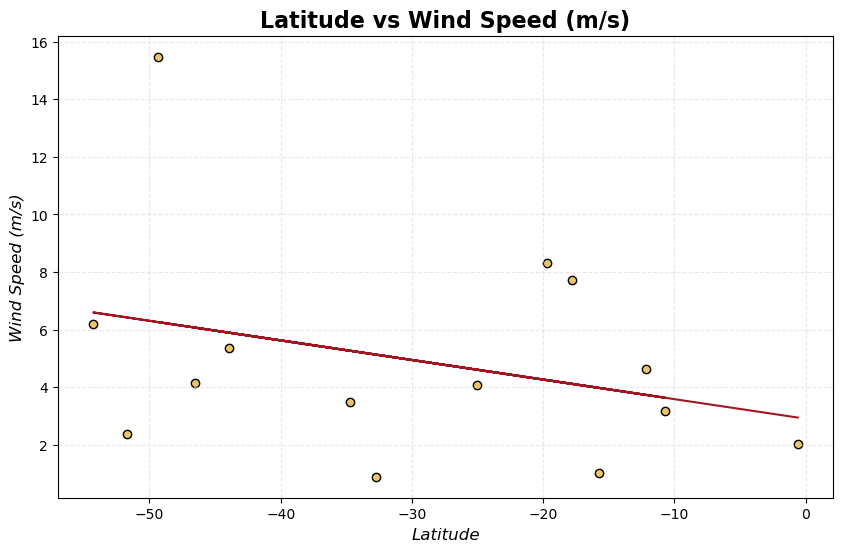

In [74]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed (m/s)", (-30,0))

**Discussion about the linear relationship:** Latitude has a very slight correlation with Windspeeds increasing in the Northern Hemisphere and decreasing in the Southern Hemisphere.